In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227845 samples, validate on 56962 samples
Epoch 1/150
227845/227845 [==============================] - 21s 91us/step - loss: 0.0014 - val_loss: 2.9565e-04
Epoch 2/150
227845/227845 [==============================] - 20s 86us/step - loss: 2.0123e-04 - val_loss: 1.7082e-04
Epoch 3/150
227845/227845 [==============================] - 19s 85us/step - loss: 1.3996e-04 - val_loss: 1.2411e-04
Epoch 4/150
227845/227845 [==============================] - 20s 87us/step - loss: 1.2135e-04 - val_loss: 1.1596e-04
Epoch 5/150
227845/227845 [==============================] - 20s 88us/step - loss: 1.1133e-04 - val_loss: 1.0833e-04
Epoch 6/150
227845/227845 [==============================] - 20s 87us/step - loss: 9.4590e-05 - val_loss: 9.8926e-05
Epoch 7/150
227845/227845 [===================

227845/227845 [==============================] - 20s 87us/step - loss: 3.9546e-05 - val_loss: 4.4685e-05
Epoch 69/150
227845/227845 [==============================] - 20s 86us/step - loss: 3.9543e-05 - val_loss: 3.8249e-05
Epoch 70/150
227845/227845 [==============================] - 20s 86us/step - loss: 3.9567e-05 - val_loss: 4.4908e-05
Epoch 71/150
227845/227845 [==============================] - 20s 86us/step - loss: 3.9265e-05 - val_loss: 6.7653e-05
Epoch 72/150
227845/227845 [==============================] - 20s 86us/step - loss: 3.9244e-05 - val_loss: 4.2741e-05
Epoch 73/150
227845/227845 [==============================] - 20s 86us/step - loss: 3.9053e-05 - val_loss: 6.8608e-05
Epoch 74/150
227845/227845 [==============================] - 20s 86us/step - loss: 3.8957e-05 - val_loss: 3.7948e-05
Epoch 75/150
227845/227845 [==============================] - 20s 88us/step - loss: 3.8878e-05 - val_loss: 5.0788e-05
Epoch 76/150
227845/227845 [==============================] - 20s 88u

227845/227845 [==============================] - 20s 88us/step - loss: 3.4415e-05 - val_loss: 3.4109e-05
Epoch 138/150
227845/227845 [==============================] - 20s 89us/step - loss: 3.4224e-05 - val_loss: 3.4744e-05
Epoch 139/150
227845/227845 [==============================] - 20s 87us/step - loss: 3.4449e-05 - val_loss: 4.1389e-05
Epoch 140/150
227845/227845 [==============================] - 20s 86us/step - loss: 3.4110e-05 - val_loss: 3.6132e-05
Epoch 141/150
227845/227845 [==============================] - 20s 86us/step - loss: 3.4395e-05 - val_loss: 3.4276e-05
Epoch 142/150
227845/227845 [==============================] - 20s 86us/step - loss: 3.4014e-05 - val_loss: 4.1628e-05
Epoch 143/150
227845/227845 [==============================] - 18s 81us/step - loss: 3.4231e-05 - val_loss: 3.3859e-05
Epoch 144/150
227845/227845 [==============================] - 20s 88us/step - loss: 3.3890e-05 - val_loss: 3.6343e-05
Epoch 145/150
227845/227845 [==============================] -

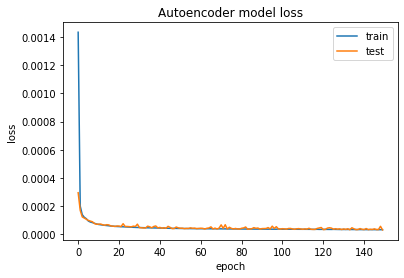

Train on 227845 samples, validate on 56962 samples
Epoch 1/50
227845/227845 [==============================] - 48s 212us/step - loss: 0.0626 - accuracy: 0.9796 - val_loss: 0.0058 - val_accuracy: 0.9992
Epoch 2/50
227845/227845 [==============================] - 46s 203us/step - loss: 0.0079 - accuracy: 0.9987 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 3/50
227845/227845 [==============================] - 46s 203us/step - loss: 0.0068 - accuracy: 0.9989 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 4/50
227845/227845 [==============================] - 46s 203us/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 5/50
227845/227845 [==============================] - 46s 202us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 6/50
227845/227845 [==============================] - 46s 202us/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 7/50
227845/227845 [=================

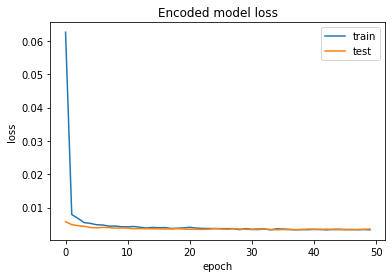

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9992451107756047


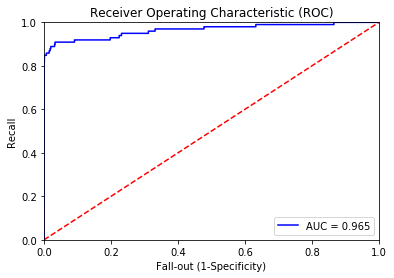

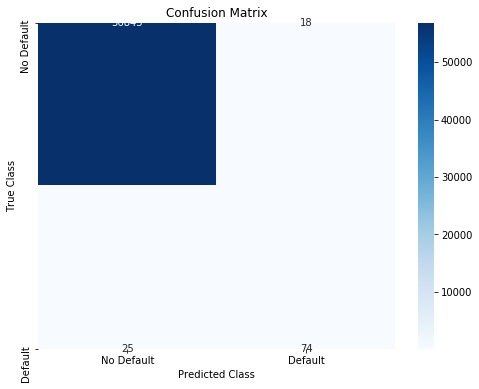

AUC(ROC): 0.873579098584814
Precision: 0.8043478260869565
Recall: 0.7474747474747475
F1 score: 0.774869109947644
False positives: 18
True positives: 74
False negatives: 25
True negatives: 56845
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227845 samples, validate on 56962 samples
Epoch 1/150
227845/227845 [==============================] - 20s 87us/step - loss: 0.0016 - val_loss: 3.1213e-04
Epoch 2/150
227845/227845 [==============================] - 19s 85us/step - loss: 2.2436e-04 - val_loss: 1.8231e-04
Epoch 3/150
227845/227845 [==============================] - 19s 85us/step - loss: 1.4928e-04 - val_loss: 1.3861e-04
Epoch 4/150
227845/227845 [==============================] - 20s 86us/step - loss: 1.2344e-04 - val_loss: 1.3180e-04
Epoch 5/150
227845/227845 [==============================] - 20s 88us/step - loss: 1.1364e-04 - val_loss: 1.2056e-04
Epoch 6/150
227845/227845 [==============================] - 20s 87us/step - loss: 1.0606e-04 - val_loss: 1.0020e-04
Epoch 7/150
227845/227845 [===================

227845/227845 [==============================] - 20s 86us/step - loss: 3.5843e-05 - val_loss: 3.9573e-05
Epoch 69/150
227845/227845 [==============================] - 20s 86us/step - loss: 3.5901e-05 - val_loss: 4.0866e-05
Epoch 70/150
227845/227845 [==============================] - 20s 88us/step - loss: 3.5401e-05 - val_loss: 3.4263e-05
Epoch 71/150
227845/227845 [==============================] - 20s 89us/step - loss: 3.5214e-05 - val_loss: 3.3897e-05
Epoch 72/150
227845/227845 [==============================] - 20s 89us/step - loss: 3.5174e-05 - val_loss: 3.4703e-05
Epoch 73/150
227845/227845 [==============================] - 20s 88us/step - loss: 3.4969e-05 - val_loss: 4.0310e-05
Epoch 74/150
227845/227845 [==============================] - 20s 88us/step - loss: 3.4959e-05 - val_loss: 3.1771e-05
Epoch 75/150
227845/227845 [==============================] - 20s 88us/step - loss: 3.4747e-05 - val_loss: 3.3889e-05
Epoch 76/150
227845/227845 [==============================] - 20s 88u

227845/227845 [==============================] - 20s 87us/step - loss: 3.0727e-05 - val_loss: 3.6126e-05
Epoch 138/150
227845/227845 [==============================] - 20s 87us/step - loss: 3.0790e-05 - val_loss: 3.3162e-05
Epoch 139/150
227845/227845 [==============================] - 20s 89us/step - loss: 3.0710e-05 - val_loss: 3.2473e-05
Epoch 140/150
227845/227845 [==============================] - 20s 89us/step - loss: 3.0776e-05 - val_loss: 3.1925e-05
Epoch 141/150
227845/227845 [==============================] - 19s 84us/step - loss: 3.0378e-05 - val_loss: 3.0464e-05
Epoch 142/150
227845/227845 [==============================] - 20s 90us/step - loss: 3.0850e-05 - val_loss: 3.2899e-05
Epoch 143/150
227845/227845 [==============================] - 21s 91us/step - loss: 3.0513e-05 - val_loss: 3.2816e-05
Epoch 144/150
227845/227845 [==============================] - 20s 89us/step - loss: 3.0692e-05 - val_loss: 3.3605e-05
Epoch 145/150
227845/227845 [==============================] -

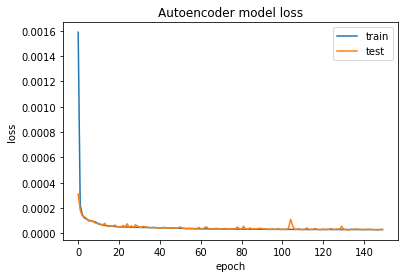

Train on 227845 samples, validate on 56962 samples
Epoch 1/50
227845/227845 [==============================] - 48s 211us/step - loss: 0.0274 - accuracy: 0.9924 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 2/50
227845/227845 [==============================] - 46s 204us/step - loss: 0.0071 - accuracy: 0.9988 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/50
227845/227845 [==============================] - 46s 201us/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 4/50
227845/227845 [==============================] - 46s 203us/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 5/50
227845/227845 [==============================] - 46s 204us/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 6/50
227845/227845 [==============================] - 46s 203us/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 7/50
227845/227845 [=================

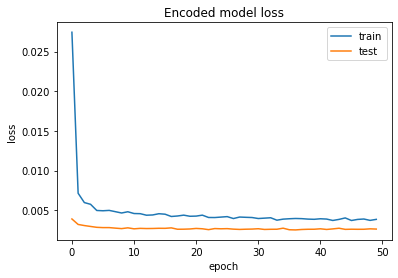

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9995435553526912


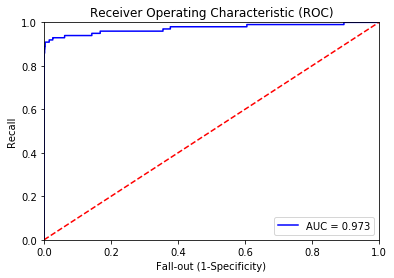

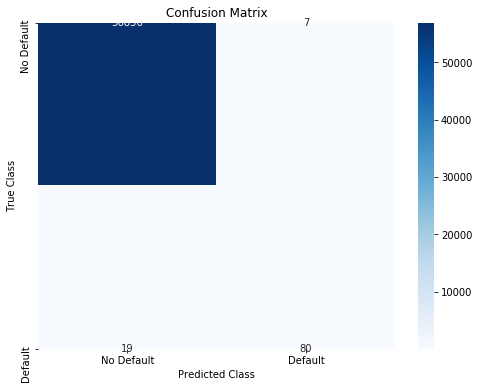

AUC(ROC): 0.9039788525921864
Precision: 0.9195402298850575
Recall: 0.8080808080808081
F1 score: 0.8602150537634408
False positives: 7
True positives: 80
False negatives: 19
True negatives: 56856
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227846 samples, validate on 56961 samples
Epoch 1/150
227846/227846 [==============================] - 21s 94us/step - loss: 0.0016 - val_loss: 2.7966e-04
Epoch 2/150
227846/227846 [==============================] - 20s 87us/step - loss: 2.0954e-04 - val_loss: 1.6282e-04
Epoch 3/150
227846/227846 [==============================] - 20s 87us/step - loss: 1.3685e-04 - val_loss: 1.2504e-04
Epoch 4/150
227846/227846 [==============================] - 20s 87us/step - loss: 1.2159e-04 - val_loss: 1.2281e-04
Epoch 5/150
227846/227846 [==============================] - 20s 87us/step - loss: 1.1385e-04 - val_loss: 1.1093e-04
Epoch 6/150
227846/227846 [==============================] - 20s 87us/step - loss: 1.0289e-04 - val_loss: 9.7964e-05
Epoch 7/150
227846/227846 [===================

227846/227846 [==============================] - 20s 87us/step - loss: 4.2072e-05 - val_loss: 4.3640e-05
Epoch 69/150
227846/227846 [==============================] - 20s 87us/step - loss: 4.2215e-05 - val_loss: 4.4388e-05
Epoch 70/150
227846/227846 [==============================] - 20s 87us/step - loss: 4.1917e-05 - val_loss: 4.7892e-05
Epoch 71/150
227846/227846 [==============================] - 20s 87us/step - loss: 4.1812e-05 - val_loss: 4.0605e-05
Epoch 72/150
227846/227846 [==============================] - 20s 87us/step - loss: 4.1677e-05 - val_loss: 7.1600e-05
Epoch 73/150
227846/227846 [==============================] - 20s 87us/step - loss: 4.1518e-05 - val_loss: 4.9432e-05
Epoch 74/150
227846/227846 [==============================] - 20s 87us/step - loss: 4.1658e-05 - val_loss: 4.5723e-05
Epoch 75/150
227846/227846 [==============================] - 20s 87us/step - loss: 4.1535e-05 - val_loss: 3.9764e-05
Epoch 76/150
227846/227846 [==============================] - 20s 88u

227846/227846 [==============================] - 20s 89us/step - loss: 3.6376e-05 - val_loss: 3.3306e-05
Epoch 138/150
227846/227846 [==============================] - 19s 84us/step - loss: 3.6074e-05 - val_loss: 4.5932e-05
Epoch 139/150
227846/227846 [==============================] - 21s 91us/step - loss: 3.5954e-05 - val_loss: 3.6388e-05
Epoch 140/150
227846/227846 [==============================] - 21s 91us/step - loss: 3.5848e-05 - val_loss: 4.3019e-05
Epoch 141/150
227846/227846 [==============================] - 21s 90us/step - loss: 3.6164e-05 - val_loss: 3.4124e-05
Epoch 142/150
227846/227846 [==============================] - 21s 92us/step - loss: 3.5581e-05 - val_loss: 3.5951e-05
Epoch 143/150
227846/227846 [==============================] - 21s 91us/step - loss: 3.6014e-05 - val_loss: 3.8417e-05
Epoch 144/150
227846/227846 [==============================] - 21s 92us/step - loss: 3.5770e-05 - val_loss: 3.5590e-05
Epoch 145/150
227846/227846 [==============================] -

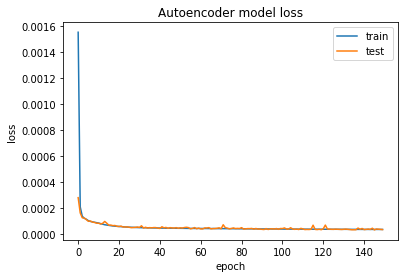

Train on 227846 samples, validate on 56961 samples
Epoch 1/50
227846/227846 [==============================] - 49s 216us/step - loss: 0.0291 - accuracy: 0.9945 - val_loss: 0.0050 - val_accuracy: 0.9991
Epoch 2/50
227846/227846 [==============================] - 47s 207us/step - loss: 0.0090 - accuracy: 0.9983 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 3/50
227846/227846 [==============================] - 47s 207us/step - loss: 0.0073 - accuracy: 0.9986 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 4/50
227846/227846 [==============================] - 47s 207us/step - loss: 0.0062 - accuracy: 0.9988 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 5/50
227846/227846 [==============================] - 47s 208us/step - loss: 0.0057 - accuracy: 0.9990 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 6/50
227846/227846 [==============================] - 47s 208us/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 7/50
227846/227846 [=================

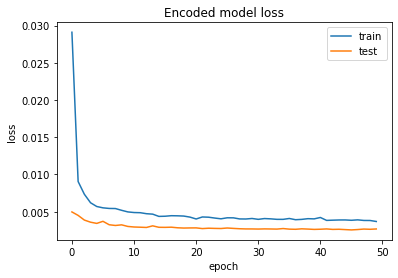

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994557679816014


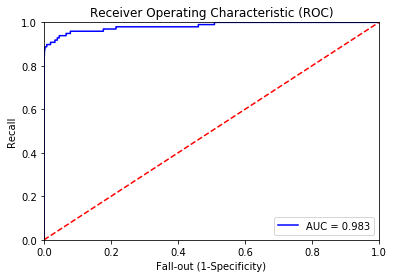

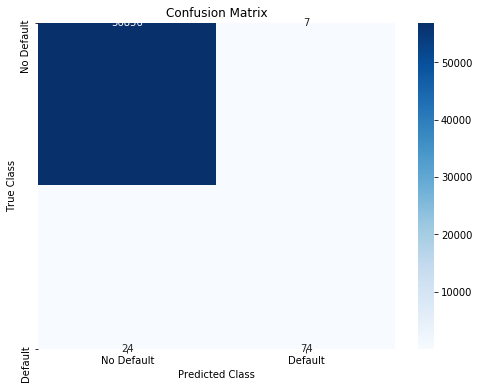

AUC(ROC): 0.8774894689599456
Precision: 0.9135802469135802
Recall: 0.7551020408163265
F1 score: 0.8268156424581006
False positives: 7
True positives: 74
False negatives: 24
True negatives: 56856
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227846 samples, validate on 56961 samples
Epoch 1/150
227846/227846 [==============================] - 21s 93us/step - loss: 0.0015 - val_loss: 2.7969e-04
Epoch 2/150
227846/227846 [==============================] - 21s 90us/step - loss: 2.0702e-04 - val_loss: 1.5339e-04
Epoch 3/150
227846/227846 [==============================] - 21s 90us/step - loss: 1.4365e-04 - val_loss: 1.2777e-04
Epoch 4/150
227846/227846 [==============================] - 21s 90us/step - loss: 1.2244e-04 - val_loss: 1.1777e-04
Epoch 5/150
227846/227846 [==============================] - 21s 91us/step - loss: 1.0962e-04 - val_loss: 9.8119e-05
Epoch 6/150
227846/227846 [==============================] - 21s 90us/step - loss: 9.1886e-05 - val_loss: 8.0867e-05
Epoch 7/150
227846/227846 [===================

227846/227846 [==============================] - 20s 89us/step - loss: 3.9067e-05 - val_loss: 3.6574e-05
Epoch 69/150
227846/227846 [==============================] - 20s 88us/step - loss: 3.8842e-05 - val_loss: 3.9702e-05
Epoch 70/150
227846/227846 [==============================] - 20s 89us/step - loss: 3.8729e-05 - val_loss: 3.9170e-05
Epoch 71/150
227846/227846 [==============================] - 20s 89us/step - loss: 3.8662e-05 - val_loss: 4.1340e-05
Epoch 72/150
227846/227846 [==============================] - 20s 89us/step - loss: 3.8646e-05 - val_loss: 3.9096e-05
Epoch 73/150
227846/227846 [==============================] - 20s 89us/step - loss: 3.8156e-05 - val_loss: 3.8633e-05
Epoch 74/150
227846/227846 [==============================] - 20s 89us/step - loss: 3.8073e-05 - val_loss: 3.5422e-05
Epoch 75/150
227846/227846 [==============================] - 20s 88us/step - loss: 3.8011e-05 - val_loss: 4.4782e-05
Epoch 76/150
227846/227846 [==============================] - 20s 89u

227846/227846 [==============================] - 21s 91us/step - loss: 3.3333e-05 - val_loss: 2.9365e-05
Epoch 138/150
227846/227846 [==============================] - 20s 90us/step - loss: 3.3010e-05 - val_loss: 2.9075e-05
Epoch 139/150
227846/227846 [==============================] - 21s 90us/step - loss: 3.3251e-05 - val_loss: 3.3248e-05
Epoch 140/150
227846/227846 [==============================] - 20s 90us/step - loss: 3.3292e-05 - val_loss: 3.0265e-05
Epoch 141/150
227846/227846 [==============================] - 21s 91us/step - loss: 3.3007e-05 - val_loss: 3.4581e-05
Epoch 142/150
227846/227846 [==============================] - 20s 90us/step - loss: 3.3021e-05 - val_loss: 3.6369e-05
Epoch 143/150
227846/227846 [==============================] - 21s 90us/step - loss: 3.3176e-05 - val_loss: 3.8252e-05
Epoch 144/150
227846/227846 [==============================] - 20s 89us/step - loss: 3.3160e-05 - val_loss: 3.4985e-05
Epoch 145/150
227846/227846 [==============================] -

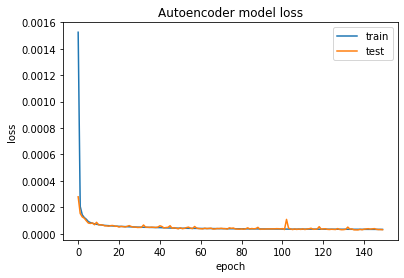

Train on 227846 samples, validate on 56961 samples
Epoch 1/50
227846/227846 [==============================] - 49s 217us/step - loss: 0.0297 - accuracy: 0.9923 - val_loss: 0.0071 - val_accuracy: 0.9992
Epoch 2/50
227846/227846 [==============================] - 48s 209us/step - loss: 0.0072 - accuracy: 0.9989 - val_loss: 0.0050 - val_accuracy: 0.9992
Epoch 3/50
227846/227846 [==============================] - 47s 208us/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 4/50
227846/227846 [==============================] - 48s 209us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 5/50
227846/227846 [==============================] - 48s 209us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 6/50
227846/227846 [==============================] - 47s 208us/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 7/50
227846/227846 [=================

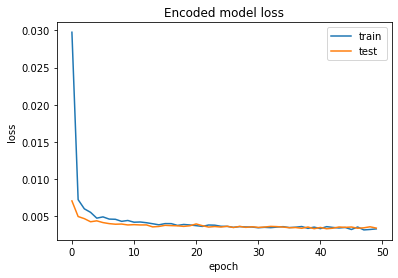

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.999420656238479


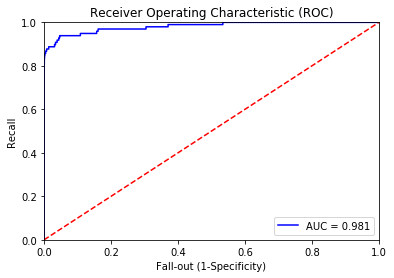

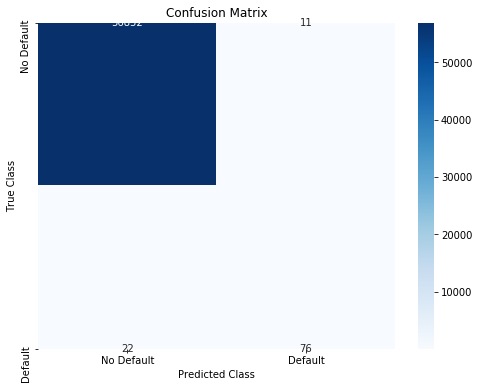

AUC(ROC): 0.8876583783364743
Precision: 0.8735632183908046
Recall: 0.7755102040816326
F1 score: 0.8216216216216217
False positives: 11
True positives: 76
False negatives: 22
True negatives: 56852
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227846 samples, validate on 56961 samples
Epoch 1/150
227846/227846 [==============================] - 19s 84us/step - loss: 0.0017 - val_loss: 3.2624e-04
Epoch 2/150
227846/227846 [==============================] - 19s 82us/step - loss: 2.4683e-04 - val_loss: 1.8794e-04
Epoch 3/150
227846/227846 [==============================] - 19s 82us/step - loss: 1.5580e-04 - val_loss: 1.3910e-04
Epoch 4/150
227846/227846 [==============================] - 19s 82us/step - loss: 1.2475e-04 - val_loss: 1.2266e-04
Epoch 5/150
227846/227846 [==============================] - 19s 82us/step - loss: 1.1971e-04 - val_loss: 1.1776e-04
Epoch 6/150
227846/227846 [==============================] - 19s 82us/step - loss: 1.1029e-04 - val_loss: 1.7594e-04
Epoch 7/150
227846/227846 [===================

227846/227846 [==============================] - 17s 74us/step - loss: 3.8107e-05 - val_loss: 3.7464e-05
Epoch 69/150
227846/227846 [==============================] - 17s 74us/step - loss: 3.8064e-05 - val_loss: 3.7573e-05
Epoch 70/150
227846/227846 [==============================] - 17s 74us/step - loss: 3.8129e-05 - val_loss: 3.7899e-05
Epoch 71/150
227846/227846 [==============================] - 17s 74us/step - loss: 3.8025e-05 - val_loss: 3.7662e-05
Epoch 72/150
227846/227846 [==============================] - 17s 74us/step - loss: 3.7423e-05 - val_loss: 4.7485e-05
Epoch 73/150
227846/227846 [==============================] - 17s 73us/step - loss: 3.7598e-05 - val_loss: 4.0976e-05
Epoch 74/150
227846/227846 [==============================] - 17s 74us/step - loss: 3.7291e-05 - val_loss: 4.1522e-05
Epoch 75/150
227846/227846 [==============================] - 17s 74us/step - loss: 3.7412e-05 - val_loss: 3.6492e-05
Epoch 76/150
227846/227846 [==============================] - 17s 74u

227846/227846 [==============================] - 18s 80us/step - loss: 3.1399e-05 - val_loss: 3.4108e-05
Epoch 138/150
227846/227846 [==============================] - 18s 80us/step - loss: 3.1634e-05 - val_loss: 3.0897e-05
Epoch 139/150
227846/227846 [==============================] - 18s 80us/step - loss: 3.0986e-05 - val_loss: 3.3805e-05
Epoch 140/150
227846/227846 [==============================] - 18s 80us/step - loss: 3.1167e-05 - val_loss: 3.5718e-05
Epoch 141/150
227846/227846 [==============================] - 18s 80us/step - loss: 3.1090e-05 - val_loss: 6.9953e-05
Epoch 142/150
227846/227846 [==============================] - 18s 80us/step - loss: 3.0966e-05 - val_loss: 3.6989e-05
Epoch 143/150
227846/227846 [==============================] - 18s 80us/step - loss: 3.0847e-05 - val_loss: 3.4834e-05
Epoch 144/150
227846/227846 [==============================] - 18s 80us/step - loss: 3.0879e-05 - val_loss: 3.4007e-05
Epoch 145/150
227846/227846 [==============================] -

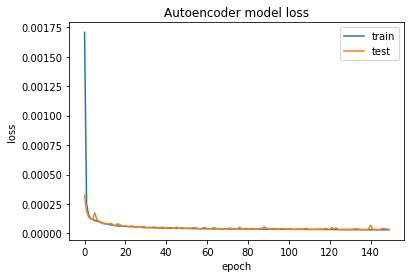

Train on 227846 samples, validate on 56961 samples
Epoch 1/50
227846/227846 [==============================] - 41s 181us/step - loss: 0.0319 - accuracy: 0.9928 - val_loss: 0.0049 - val_accuracy: 0.9991
Epoch 2/50
227846/227846 [==============================] - 40s 177us/step - loss: 0.0080 - accuracy: 0.9987 - val_loss: 0.0049 - val_accuracy: 0.9994
Epoch 3/50
227846/227846 [==============================] - 41s 178us/step - loss: 0.0067 - accuracy: 0.9990 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 4/50
227846/227846 [==============================] - 41s 178us/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 5/50
227846/227846 [==============================] - 41s 179us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 6/50
227846/227846 [==============================] - 43s 189us/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 7/50
227846/227846 [=================

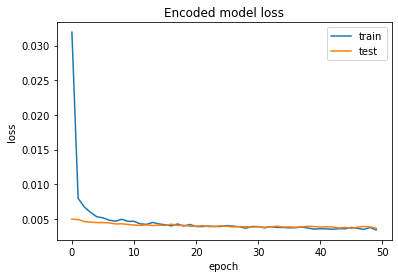

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993328768806727


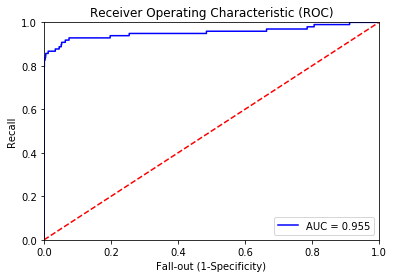

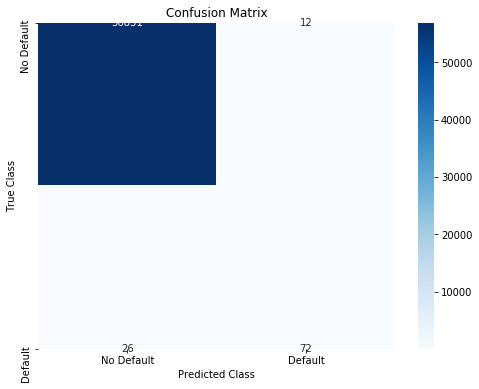

AUC(ROC): 0.867241422007137
Precision: 0.8571428571428571
Recall: 0.7346938775510204
F1 score: 0.7912087912087913
False positives: 12
True positives: 72
False negatives: 26
True negatives: 56851


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(5, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = BorderlineSMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 56852.0
 Average fp = 11.0
 Average fn = 23.2
 Average tp = 75.2
 Average Precision = 0.8723897911832946
 Average Recall = 0.7642276422764227
 Average F1 score = 0.8147345612134345


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284260
 Total fp: 55
 Total fn: 116
 Total tp: 376
 Total Precision = 0.8723897911832946
 Total Recall = 0.7642276422764228
 Total F1_score = 0.8147345612134346


In [9]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 26291.834661483765 seconds ---
26291.834661483765


In [10]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

7.303287405967712
